In [16]:
import numpy as np
import matplotlib.pyplot as plt
from finite_volume.advection import AdvectionSolver
from finite_volume.initial_conditions import generate_ic


def l1(x: np.ndarray) -> float:
    return np.mean(np.abs(x))


def l2(x: np.ndarray) -> float:
    return np.sqrt(np.mean(np.square(x)))


def linf(x: np.ndarray) -> float:
    return np.max(np.abs(x))

In [17]:
p = 2
a = 1
k = -2
ic_type__PAD = "square", (0, 1)
quadrature = "gauss-legendre"
limiter_config = dict()

In [18]:
ic_type, PAD = ic_type__PAD


def linear_transformation(x):
    return a * x + k


def u0(x, y):
    return generate_ic(type=ic_type, x=x, y=y)


def u0_shifted(x, y):
    return linear_transformation(u0(x, y))


u0_shifted.__name__ += f"_{a}_{k}"

shared_config = dict(
    **limiter_config,
    load=False,
    save=False,
    v=(1, 1),
    n=(64,),
    order=p + 1,
    courant=0.8,
    snapshot_dt=2,
    flux_strategy=quadrature,
)

# baseline
solver = AdvectionSolver(
    **shared_config,
    u0=u0,
    PAD=PAD,
)
solver.rkorder()

# shifted initial condition
translated_solver = AdvectionSolver(
    **shared_config,
    u0=u0_shifted,
    PAD=sorted((linear_transformation(PAD[0]), linear_transformation(PAD[1]))),
)
translated_solver.rkorder()

# check equivariance
diffs = (
    linear_transformation(solver.u_snapshots[-1][1])
    - translated_solver.u_snapshots[-1][1]
)

print(l1(diffs))
print(l2(diffs))
print(linf(diffs))

New solution instance...


100%|██████████| 2.0/2 [00:01]                 



New solution instance...


100%|██████████| 2.0/2 [00:02]                 


1.784894931508574e-15
2.2707888109282307e-15
5.773159728050814e-15


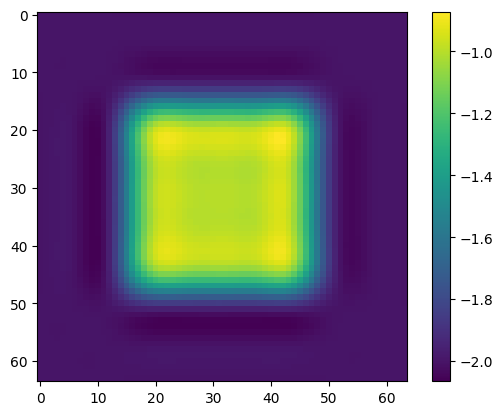

In [19]:
plt.imshow(np.flipud(linear_transformation(solver.u_snapshots[-1][1])))
plt.colorbar()

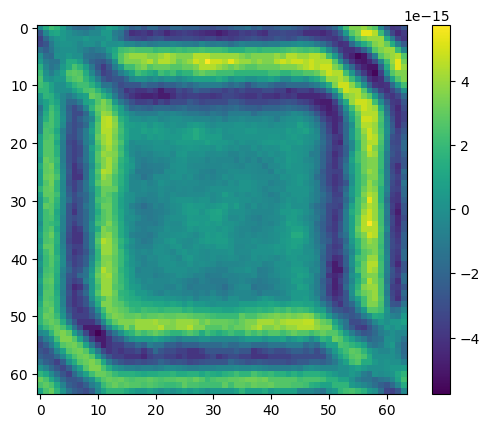

In [20]:
plt.imshow(
    np.flipud(
        translated_solver.u_snapshots[-1][1]
        - linear_transformation(solver.u_snapshots[-1][1])
    )
)
plt.colorbar()